In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np

In [6]:
file1 = open('/home/hyang/NNCLIP/CyCLIP/logs/CLIP_3M/output.log', 'r')
Lines = file1.readlines()
count = 0
learn_rate_inmodal = []
learn_rate_crossmodal = []
cross_modal = True
# Strips the newline character
for line in Lines:
    a = re.search("Learning Rate:", line)
    b = re.search("Multimodal", line)
    c = re.search("Inmodal", line)
    if b:
        cross_modal = True
    if c:
        cross_modal = False
    if a and cross_modal:
        learn_rate_crossmodal.append(float(line.strip()[-11:]))
    elif a:
        # print(line)
        # print(cross_modal)
        learn_rate_inmodal.append(float(line.strip()[-11:]))

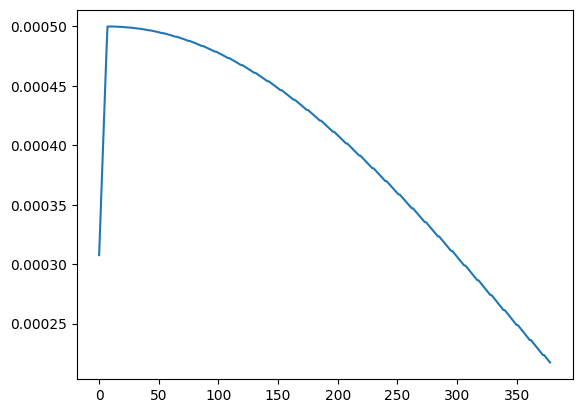

In [7]:
plt.plot(learn_rate_crossmodal)

In [3]:
def calcualte_num_batches(options, num_batches):
    update_epoch = options.epochs - options.inmodal_warmup - options.multimodal_warmup
    num_update = update_epoch // options.loader_update_freq
    left_off_epoch = update_epoch % options.loader_update_freq
    total_step = 0
    for i in range(num_update):
        total_step = total_step + (i * options.update_filter_ratio + options.filter_ratio) * options.loader_update_freq * num_batches
    total_step =  total_step + ((i+1) * options.update_filter_ratio + options.filter_ratio) * num_batches * left_off_epoch
    return total_step


def cosine_scheduler_mock(base_lr, post_lr, num_warmup_steps, total_steps):
    def _scheduler(current_step, lr_adjust=False):
        if lr_adjust:
            lr = post_lr
        elif(current_step < num_warmup_steps):
            lr = base_lr * (current_step + 1) / num_warmup_steps
        else:
            n = current_step - num_warmup_steps
            d = total_steps - num_warmup_steps
            lr = 0.5 * (1 + np.cos(np.pi * n / d)) * base_lr
        return lr, current_step
    return _scheduler

In [8]:
class op(object):
    def __init__(self, epochs, inmodal_warmup, multimodal_warmup, loader_update_freq, update_filter_ratio, filter_ratio):
            self.epochs = epochs
            self.inmodal_warmup = inmodal_warmup
            self.multimodal_warmup = multimodal_warmup
            self.loader_update_freq = loader_update_freq
            self.update_filter_ratio = update_filter_ratio
            self.filter_ratio = filter_ratio
            

In [9]:
options = op(32, 5, 1, 1, 0.005, 0.1)
epochs = list(range(7,32))
total = calcualte_num_batches(options, 390)
train_num_batches = total // (options.epochs - options.inmodal_warmup - options.multimodal_warmup)
num_batches = list(range(390, 3200, 20))
# total = 1954 * 32
scheduler = cosine_scheduler_mock(base_lr = 0.0005, post_lr = 5e-06, num_warmup_steps = 6000, total_steps = total)

In [11]:
1000000/1024

976.5625

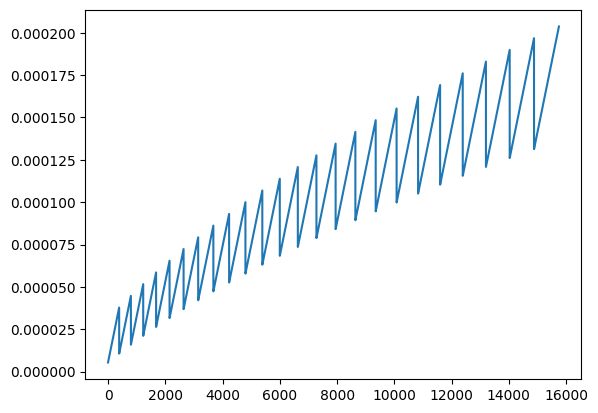

In [10]:
total_lr = []
total_step = []
for i in epochs:
    batch_size = num_batches[i-7]
    for j in range(batch_size):
        step = train_num_batches * (i - 6) + j
        lr, current_step = scheduler(step)
        total_lr.append(lr) 
        total_step.append(current_step) 

plt.plot(total_lr)

In [1]:
import numpy as np
for i in range(5):
    a = np.load("/home/hyang/NNCLIP/clip_1M_100_poison_200_backdoor_{}_tiger.npz".format(i+1))
    arr = a["arr_0"][0]
    indices = np.argsort(arr)
    top_50_elements = arr[indices[-2000:]]
    print(top_50_elements.mean())
    print(top_50_elements.std())
for i in range(5):
    a = np.load("/home/hyang/NNCLIP/clip_1M_100_poison_200_backdoor_{}_random.npz".format(i+1))
    arr = a["arr_0"][0]
    indices = np.argsort(arr)
    top_50_elements = arr[indices[-2000:]]
    print(top_50_elements.mean())
    print(top_50_elements.std())

0.26218435
0.1448118
0.30636466
0.13169897
0.3013731
0.1196945
0.29720032
0.115712136
0.2699082
0.12723106


In [ ]:
for i in range(5):
    a = np.load("/home/hyang/NNCLIP/clip_1M_100_poison_200_backdoor_{}_random.npz".format(i+1))
    arr = a["arr_0"][0]
    indices = np.argsort(arr)
    top_50_elements = arr[indices[-2000:]]
    print(top_50_elements.mean())
    print(top_50_elements.std())

python -m src.main --name safeclip_1M_warp --train_data ../train_warped_1M_suit_1500_backdoor.csv --validation_data ../valid_temp.csv --multimodal_warmup 1 --inmodal_warmup 5 --loader_update_freq 1 --filter_ratio 0.15 --epochs 38 --batch_size 256 --memory_bank --memory_bank_size 21840 --save_index --device_ids 0 1 --distributed --distributed_init_method tcp://127.0.0.1:4433 --num_workers 12 --filter_lr 5e-6

In [5]:
import pandas as pd

In [8]:
data=pd.read_csv('/home/jigao/RoCLIP/CyCLIP/indices/clip_1M_100_poison_200_backdoor_update1.tsv',sep='\t', header=None)

In [12]:
np.mean(data[1].tolist())

0.37445498694449997